In [1]:
import scipy
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
salary_data = pd.read_csv('datasets/Salary_Data.csv')

salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
num_records = salary_data.shape[0]

num_records

37

In [4]:
import math 

def z_score(series, value):
    mean = float(series.mean())
    
    variance = float(series.var())
    std = float(math.sqrt(variance))
    
    return float((value - mean) / std)

In [5]:
salary_data['z_score_salary'] = [1.00] * num_records

salary_data.head()

,YearsExperience,Salary,z_score_salary
0,1.1,39343.0,1.0
1,1.3,46205.0,1.0
2,1.5,37731.0,1.0
3,2.0,43525.0,1.0
4,2.2,39891.0,1.0


In [6]:
for i in range(len(salary_data['Salary'])):
    salary_data['z_score_salary'][i] = z_score(salary_data['Salary'], 
                                               salary_data['Salary'][i])

In [7]:
salary_data['Salary'].mean()

74117.4054054054

In [8]:
salary_data.sample(10)

,YearsExperience,Salary,z_score_salary
21,5.1,66029.0,-0.298976
35,10.3,122391.0,1.784361
18,4.1,57081.0,-0.629725
29,8.3,101302.0,1.004838
24,6.0,93940.0,0.732712
33,9.5,116969.0,1.583945
23,5.9,81363.0,0.267822
8,3.0,60150.0,-0.516284
34,9.6,112635.0,1.423745
32,9.0,105582.0,1.163041


In [9]:
salary_data.describe()

,YearsExperience,Salary,z_score_salary
count,37.000000,37.000000,3.700000e+01
mean,5.118919,74117.405405,1.920386e-16
std,2.804048,27053.719205,1.000000e+00
min,1.100000,37731.000000,-1.344969e+00
25%,3.000000,56642.000000,-6.459521e-01
50%,4.100000,63218.000000,-4.028801e-01
75%,7.900000,101302.000000,1.004838e+00
max,10.500000,122391.000000,1.784361e+00


In [10]:
salary_data['z_score_yrexp'] = [1.00] * num_records

salary_data.head()

,YearsExperience,Salary,z_score_salary,z_score_yrexp
0,1.1,39343.0,-1.285384,1.0
1,1.3,46205.0,-1.031740,1.0
2,1.5,37731.0,-1.344969,1.0
3,2.0,43525.0,-1.130802,1.0
4,2.2,39891.0,-1.265128,1.0


In [11]:
salary_data['z_score_yrexp'] = scipy.stats.zscore(salary_data['YearsExperience'])

salary_data.sample(10)

,YearsExperience,Salary,z_score_salary,z_score_yrexp
8,3.0,60150.0,-0.516284,-0.766088
3,2.0,43525.0,-1.130802,-1.127634
34,9.6,112635.0,1.423745,1.620119
11,3.0,60150.0,-0.516284,-0.766088
24,6.0,93940.0,0.732712,0.318552
28,8.1,101302.0,1.004838,1.077799
25,6.8,91738.0,0.651319,0.607789
4,2.2,39891.0,-1.265128,-1.055325
15,3.9,63218.0,-0.402880,-0.440696
33,9.5,116969.0,1.583945,1.583964


In [12]:
salary_data.describe()

,YearsExperience,Salary,z_score_salary,z_score_yrexp
count,37.000000,37.000000,3.700000e+01,3.700000e+01
mean,5.118919,74117.405405,1.920386e-16,-2.760555e-16
std,2.804048,27053.719205,1.000000e+00,1.013794e+00
min,1.100000,37731.000000,-1.344969e+00,-1.453026e+00
25%,3.000000,56642.000000,-6.459521e-01,-7.660876e-01
50%,4.100000,63218.000000,-4.028801e-01,-3.683865e-01
75%,7.900000,101302.000000,1.004838e+00,1.005490e+00
max,10.500000,122391.000000,1.784361e+00,1.945511e+00


Text(0, 0.5, 'density')

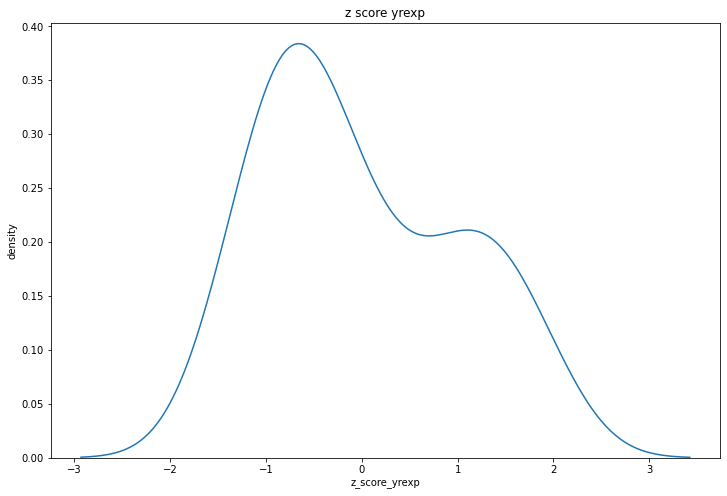

In [13]:
plt.figure(figsize=(12, 8))

sns.kdeplot(salary_data['z_score_yrexp'])

plt.title('z score yrexp')
plt.ylabel('density')

Text(0, 0.5, 'density')

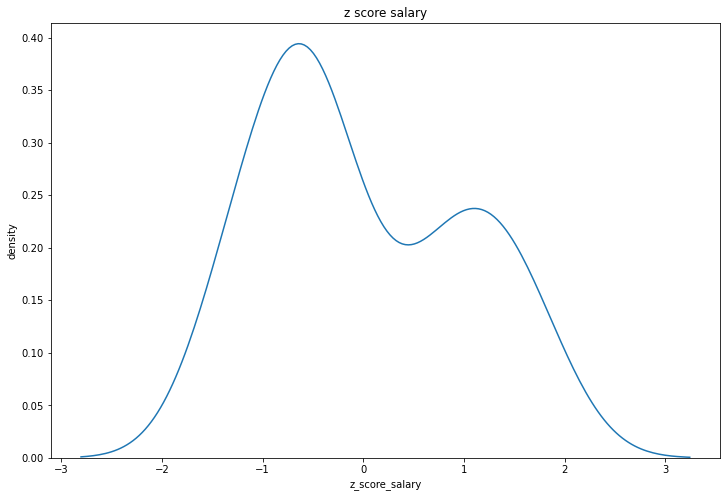

In [14]:
plt.figure(figsize=(12, 8))

sns.kdeplot(salary_data['z_score_salary'])

plt.title('z score salary')
plt.ylabel('density')

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

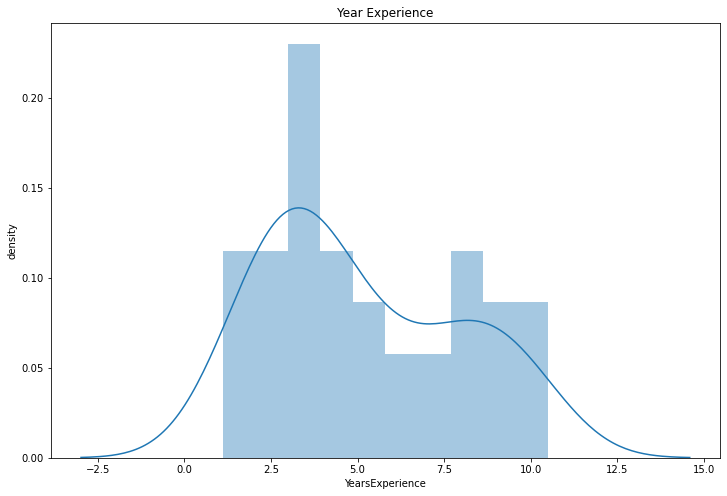

In [15]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['YearsExperience'], bins=10)

plt.title('Year Experience')
plt.ylabel('density')

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

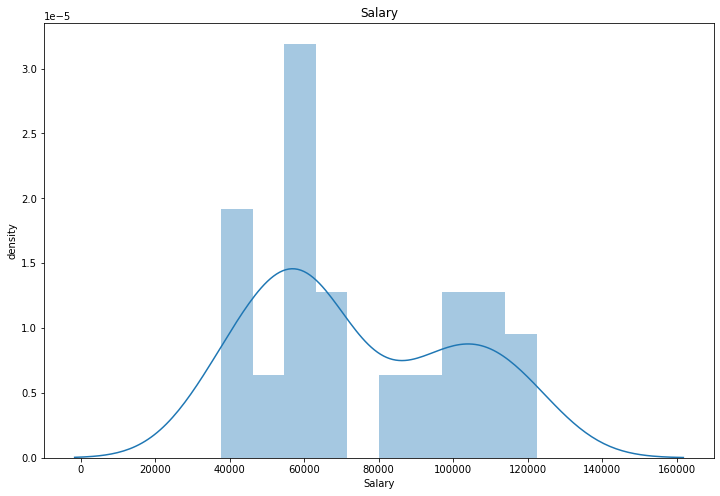

In [16]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['Salary'], bins=10)

plt.title('Salary')
plt.ylabel('density')

In [17]:
mu_yrexp =  scipy.mean(salary_data['YearsExperience'])

sigma_yrexp = scipy.std(salary_data['YearsExperience'])

/home/jubayer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.
/home/jubayer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  This is separate from the ipykernel package so we can avoid doing imports until


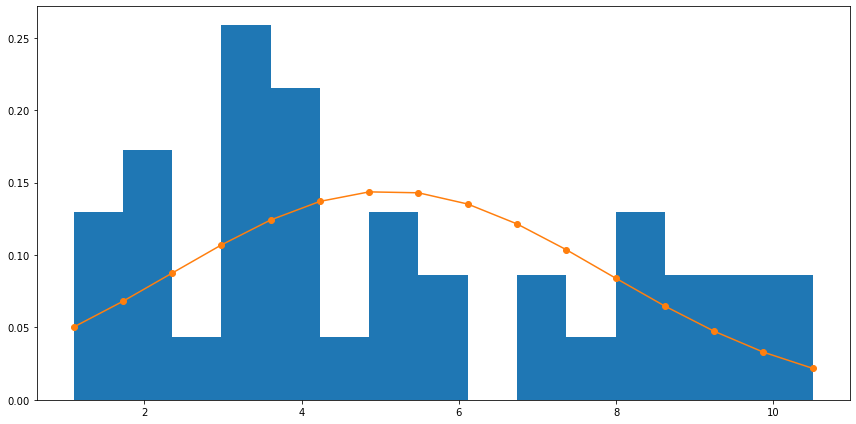

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

num_bins = 15

n, bins, patches = ax.hist(salary_data['YearsExperience'], 
                           num_bins, density = 1)

y = norm.pdf(bins, mu_yrexp, sigma_yrexp)

ax.plot(bins, y, 'o-')

fig.tight_layout()
plt.show()

In [19]:
mu_salary =  scipy.mean(salary_data['Salary'])

sigma_salary = scipy.std(salary_data['Salary'])

/home/jubayer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.
/home/jubayer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  This is separate from the ipykernel package so we can avoid doing imports until


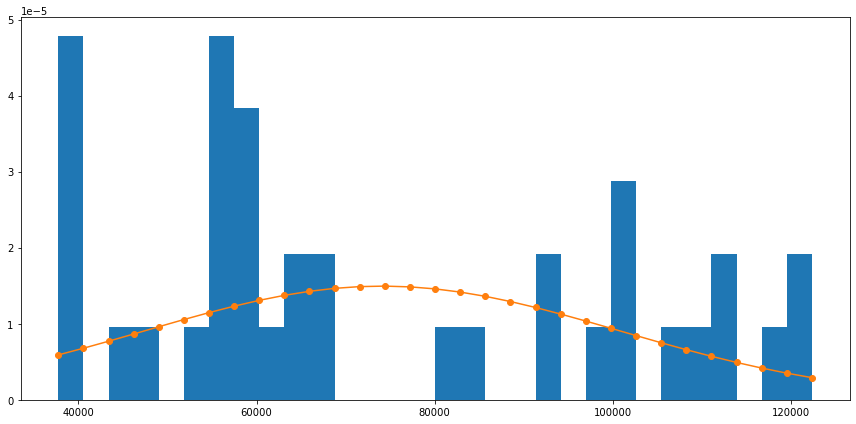

In [20]:
num_bins = 30

fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = ax.hist(salary_data['Salary'], 
                           num_bins, density = 1)

y = norm.pdf(bins, mu_salary, sigma_salary) 
ax.plot(bins, y, 'o-')

fig.tight_layout()
plt.show()

In [21]:
print("Skew of Experience : ", stats.skew(salary_data['YearsExperience']))

print("Kurtosis of Experience : ", stats.kurtosis(salary_data['YearsExperience']))

Skew of Experience :  0.4554614797952285
Kurtosis of Experience :  -1.079421068115185


In [22]:
print("Skew of z_score of Experience : ", stats.skew(salary_data['z_score_yrexp']))

print("Kurtosis of z_score of Experience : ", stats.kurtosis(salary_data['z_score_yrexp']))

Skew of z_score of Experience :  0.4554614797952289
Kurtosis of z_score of Experience :  -1.0794210681151855


In [23]:
print("Skew of salary : ", stats.skew(salary_data['Salary']))

print("Kurtosis of salary : ", stats.kurtosis(salary_data['Salary']))

Skew of salary :  0.3849211125298036
Kurtosis of salary :  -1.2309213134883714


In [24]:
print("Skew of z_score of Salary : ", stats.skew(salary_data['z_score_salary']))

print("Kurtosis of z_score of Salary : ", stats.kurtosis(salary_data['z_score_salary']))

Skew of z_score of Salary :  0.384921112529803
Kurtosis of z_score of Salary :  -1.2309213134883719
